In [3]:
#zaimportowanie danych
import numpy as np
timeseries = np.load("rest.npy")
timeseries.shape

(3050, 400)

In [4]:
#klastrowanie metodą k-means
from sklearn.cluster import KMeans

f=KMeans(n_clusters=10, random_state=0).fit(timeseries)

labels=f.labels_
labels.shape

(3050,)

In [5]:
#wyszukanie unikalnych elementów - klastrów
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
#tworzy dummy/indicator variables (index)
import pandas as pd
clust = pd.get_dummies(labels, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [7]:
#zmienia typ wartości na bool
s0=clust[0].astype('bool')

In [8]:
#tworzymy macierz o wymiarach klaster * liczba próbek
M=np.zeros((10,400))

#filter, który oblicza średnią aktywność w danym obszarze 
for i in range(10):
    filter = clust[i].astype("bool")
    mean_timeseries = timeseries[filter].mean(axis=0)
    M[i] = mean_timeseries

In [9]:
timeseries[s0].shape

(273, 400)

In [10]:
#importowanie pandas
import pandas as pd

In [12]:
#wczytywanie pliku csv
df=pd.read_csv("Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.Centroid_RAS.csv")

In [16]:
#wybieranie tylko koordynatów i konwertowanie(wybranie odpowiednich kolumn i wierszy) na numpy (wyświetlanie tylko wartości-.values)
coord=df.iloc[1:,2:5].values

In [21]:
#instalowanie jobliba żeby nilearn zadziałało
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [22]:
#importowanie plotowania z nilearn
from nilearn import plotting

In [ ]:
#plotowanie konektomu (glass brain),adjacency_matrix-macierz zerowa, rerezentująca krawędzie, node_coords - koordynat
plotting.plot_connectome( np.ones((400,400)), coord)

In [25]:
#importowanie matplotlib
import matplotlib.pyplot as plt

In [33]:
#normalizowanie poprzez wybranie maximum i minimum z macierzy 
norm = plt.Normalize(vmin=M.min(), vmax=M.max())

In [38]:
#zmienianie kolorów za pomocą pętli - dla każdego stanu jest osobny kolor
#wywoływanie każdego stanu jako osobny obrazek i zapisywanie w katalogu jako png (output file)
for i in range(10):
    colors = plt.cm.RdBu_r(norm(M[i]))
    plotting.plot_connectome(np.zeros((400,400)), coord, node_color=colors, title=f"State {i+1}", output_file='connectome_%i'%i)

In [39]:
import matplotlib.image as mpimg

In [72]:
#tworzenie tablicy z obrazkami każdego z 10 stanów
connectomes=[]
for i in range(10):
    file_path = 'connectome_%i.png'%i
    pic = mpimg.imread(file_path)
    connectomes.append(pic)

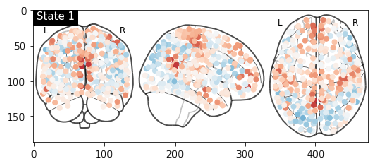

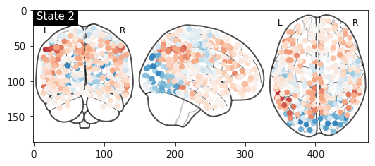

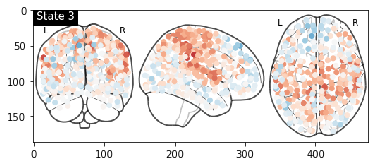

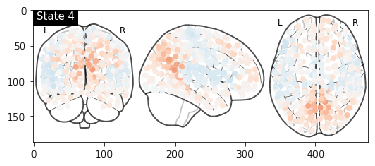

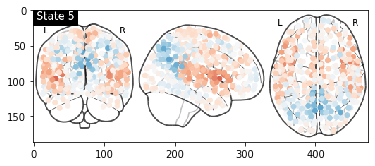

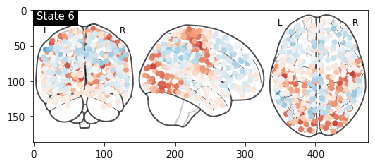

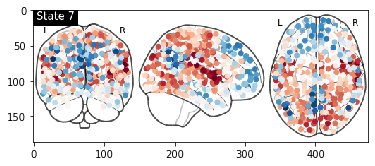

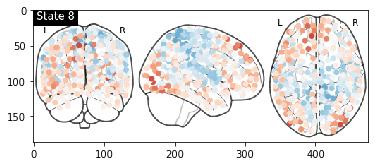

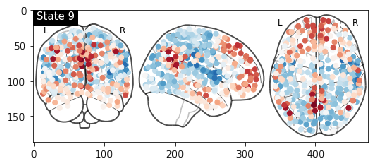

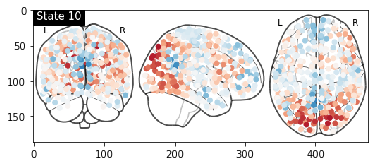

In [41]:
#wyświetlenie listy za pomocą imshow
for i in range(10):
    plt.imshow(connectomes[i])
    plt.show()

In [42]:
#tworzenie pustej listy
pics=[]

#tworzenie pętli, która iteruje po labels (długi numpy array) i dla każdego punktu odwołuje się do connectomes
for point in labels:
    pics.append(connectomes[point])

In [43]:
#wyświetlanie pics (3050 np.array-każdy to jeden obrazek)
pics

[array([[[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         

In [63]:
list(pics)

[array([[[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         ...,
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         

In [48]:
#sprawdzanie długości pics
len(pics)

3050

In [68]:
type(pics)

list

In [49]:
#instalowanie moviepy
%pip install moviepy

  Created wheel for moviepy: filename=moviepy-1.0.1-cp37-none-any.whl size=110791 sha256=779348668ff865679fbbc63382e670824608225cf9a88ccc7bcac21545c0abf6
  Stored in directory: C:\Users\Iga\AppData\Local\pip\Cache\wheels\a3\3c\07\45afe2bd5dbd3f935f445545d645f0f8c05d48340136367d45
  Created wheel for proglog: filename=proglog-0.1.9-cp37-none-any.whl size=6152 sha256=eec0453707dbc2e8821b1c5d362293fb20a08320592762316a2c989f65291bcd
  Stored in directory: C:\Users\Iga\AppData\Local\pip\Cache\wheels\65\56\60\1d0306a8d90b188af393c1812ddb502a8821b70917f82dcc00
Successfully built moviepy proglog
Note: you may need to restart the kernel to use updated packages.


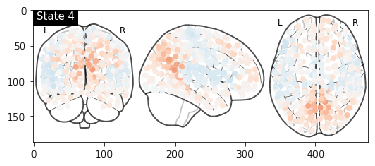

In [57]:
#sprawdzenie czy każdy element listy to na pewno obrazek
plt.imshow(pics[0])

In [75]:
%pip install scipy 

Note: you may need to restart the kernel to use updated packages.


In [92]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [94]:
from PIL import Image

In [99]:
%pip install pypng

  Created wheel for pypng: filename=pypng-0.0.20-cp37-none-any.whl size=67170 sha256=cd67092debe55e6180b8333a26f82b6376e73ec8b4f7db438aa483b02b3361d9
  Stored in directory: C:\Users\Iga\AppData\Local\pip\Cache\wheels\41\6b\ef\0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng
Note: you may need to restart the kernel to use updated packages.


In [113]:
#zapisywanie każdego zdjęcia 
for  idx, a in enumerate(pics):
    plt.imsave(f"{idx:04}_Img.png", pics[idx])